In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("customer_churn.csv")

In [17]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
df.shape

(7043, 21)

In [19]:
df = df.drop(['customerID'], axis=1)

In [20]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [22]:
df.isnull().sum().sum()

0

In [23]:
df.duplicated().sum()

22

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


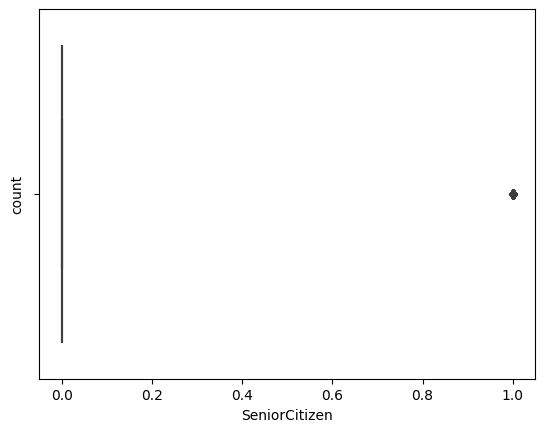

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


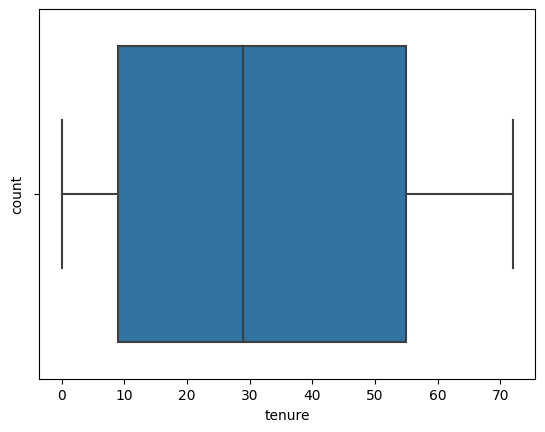

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


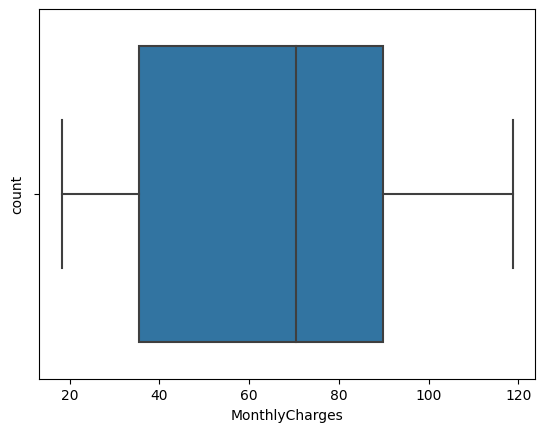

In [25]:
for column in df.columns:
    if(df[column].dtypes == "int64" or df[column].dtypes == "float64"):
        sns.boxplot(df[column])
        plt.xlabel(column)
        plt.ylabel("count")
        plt.show()

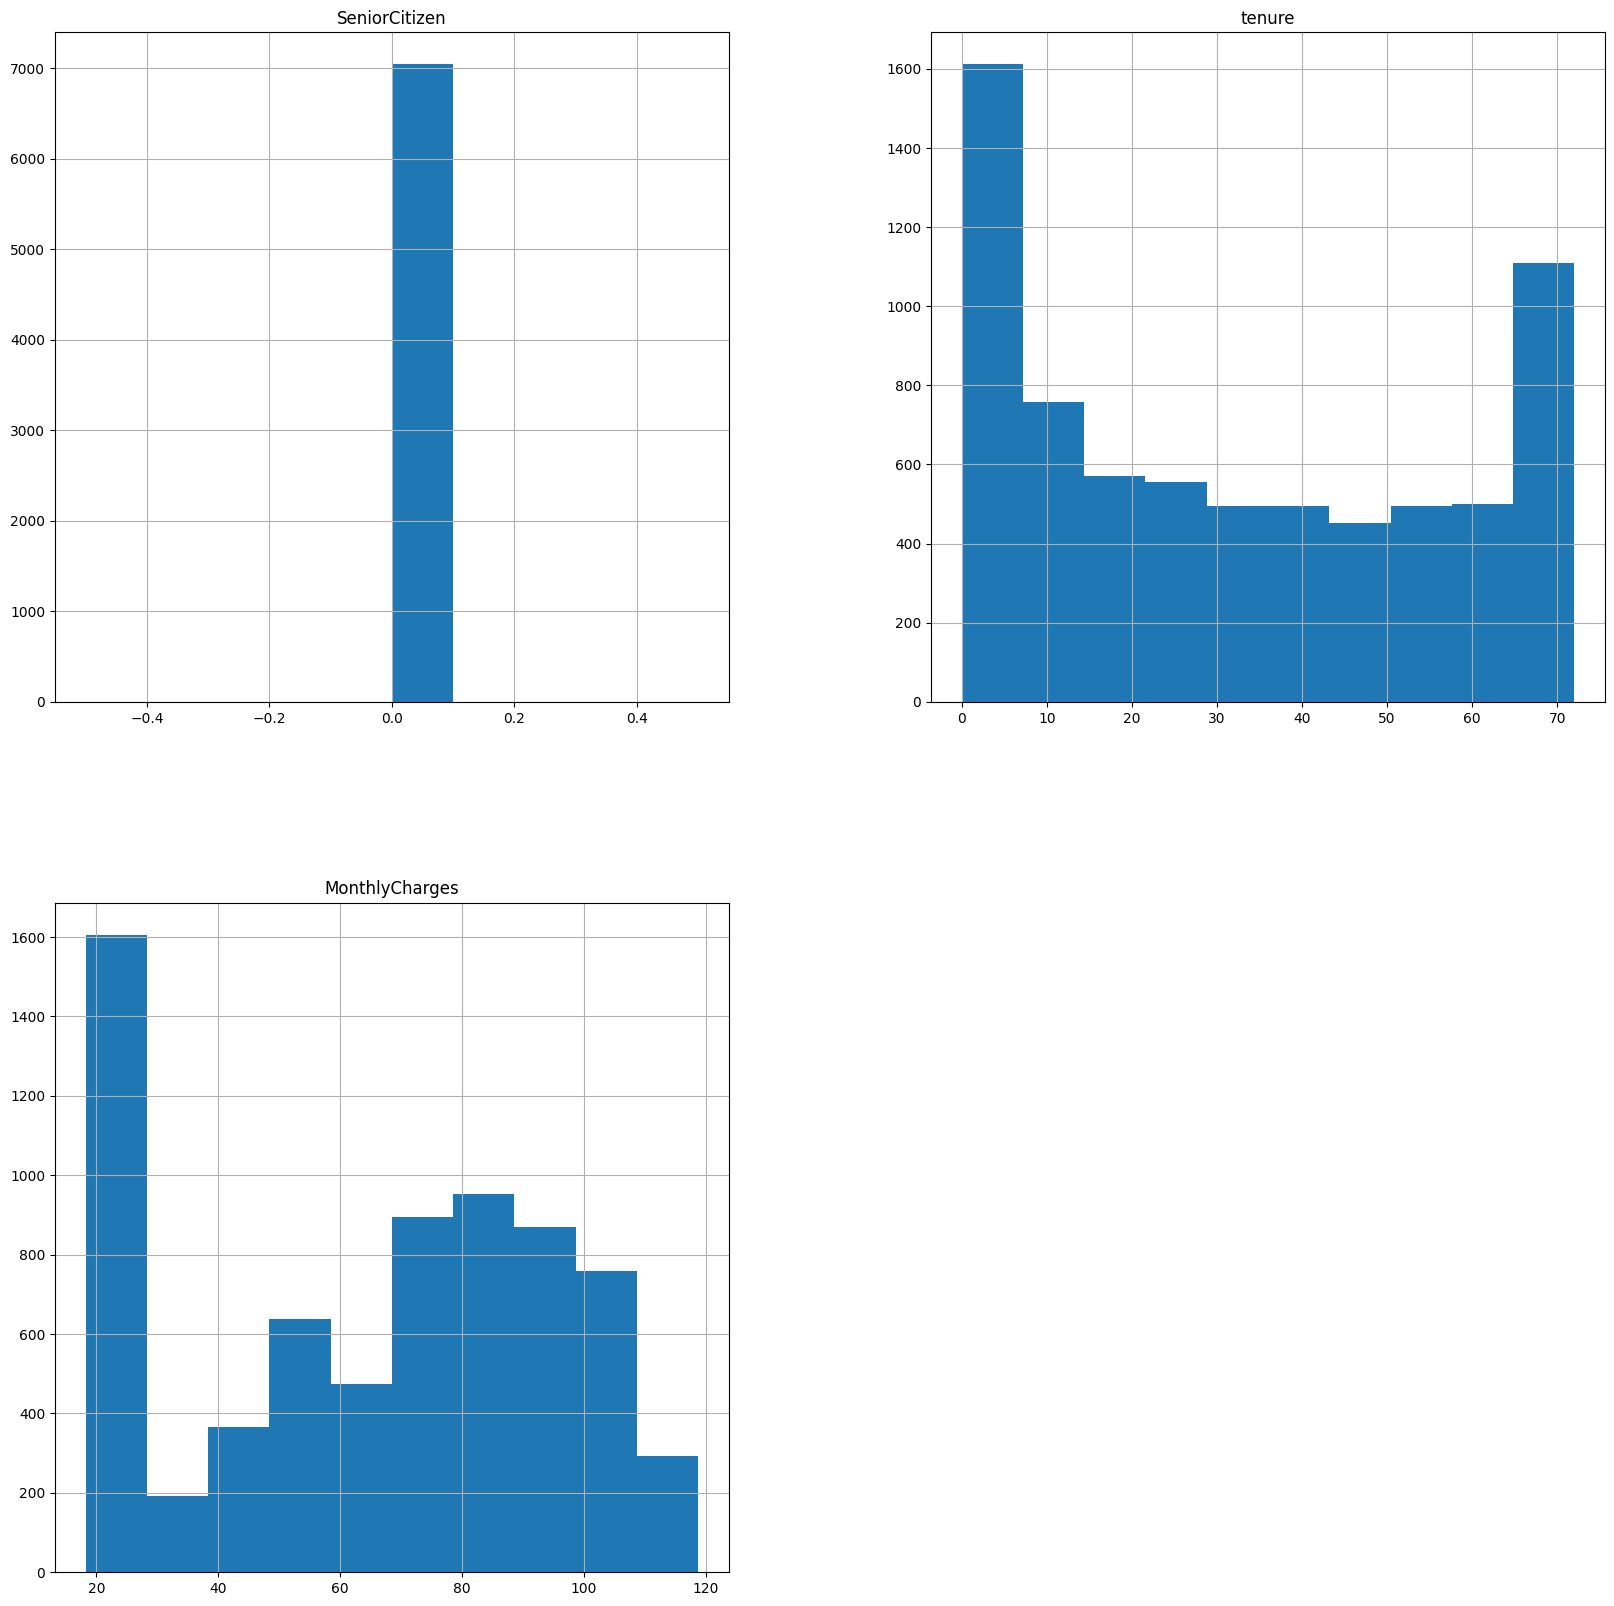

In [28]:
df.hist(figsize=(20, 20))
plt.show()

<AxesSubplot: >

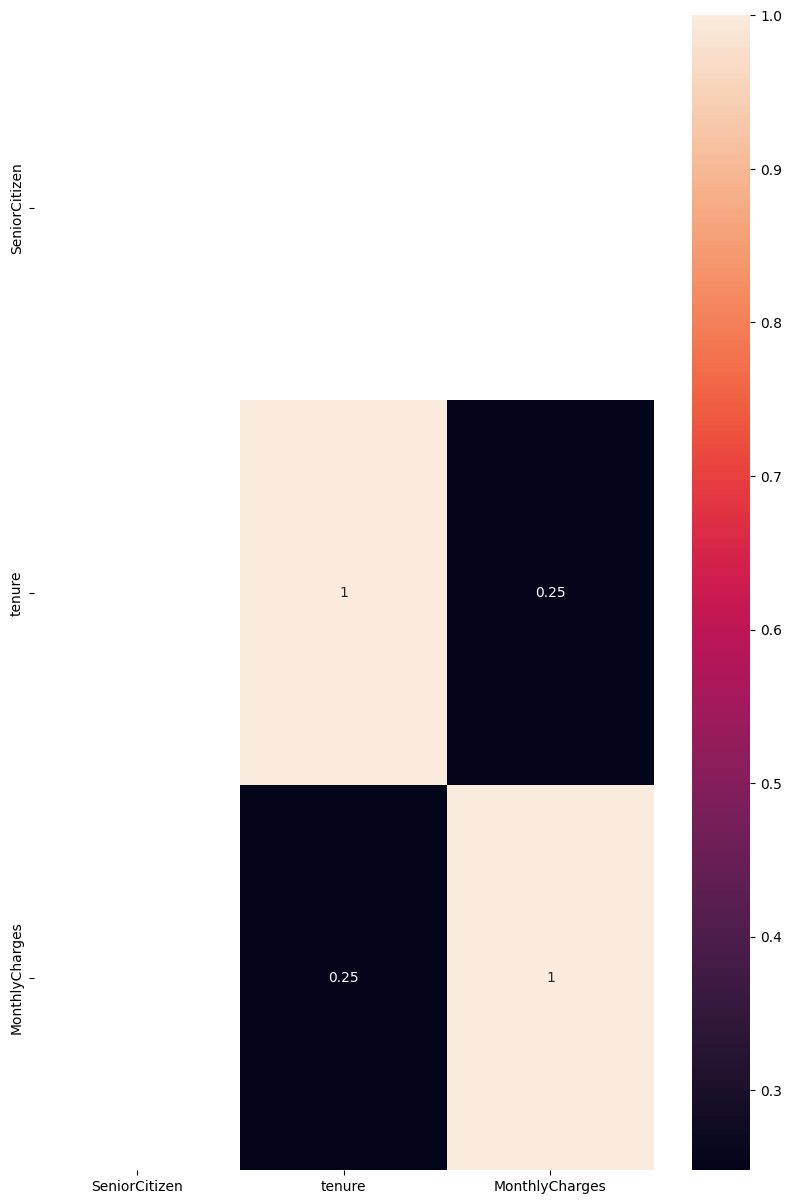

In [31]:
plt.figure(figsize=(10,15))  
sns.heatmap(df.corr(), annot=True)

In [32]:
from sklearn.preprocessing import LabelEncoder

In [34]:
categorical_columns = df.select_dtypes(include=['object']).columns

In [33]:
label_encoder = LabelEncoder()

In [35]:

df[categorical_columns] = df[categorical_columns].apply(label_encoder.fit_transform)

In [36]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0.0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0.0,0,0,34.0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0.0,0,0,2.0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0.0,0,0,45.0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0.0,0,0,2.0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [37]:
X = df.drop(['Churn'], axis=1)
y = df['Churn']

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [41]:
lda=LinearDiscriminantAnalysis()

In [42]:
lda.fit(x_train,y_train)

LinearDiscriminantAnalysis()

In [43]:
lda.transform(x_test)

array([[ 1.38896899],
       [-0.56192696],
       [-1.89734953],
       ...,
       [-0.91946533],
       [-1.22122102],
       [ 0.95737941]])

In [44]:
lda_coefficients=np.exp(np.abs(lda.coef_))

In [45]:
lda_coefficients= lda_coefficients.flatten()

In [46]:
lda_coefficients

array([1.03407679, 1.        , 1.04103341, 1.10649276, 2.17947616,
       1.33234585, 1.09280573, 1.30716081, 1.36394181, 1.22066671,
       1.14041406, 1.33562528, 1.03349832, 1.02373316, 1.30934989,
       1.19649808, 1.04937239, 2.28217068, 1.04373211])

In [47]:
num_features=X.shape[1]

In [48]:
num_features

19

In [49]:
feature_indices=np.arange(num_features)

In [50]:
feature_names=list(X.columns)

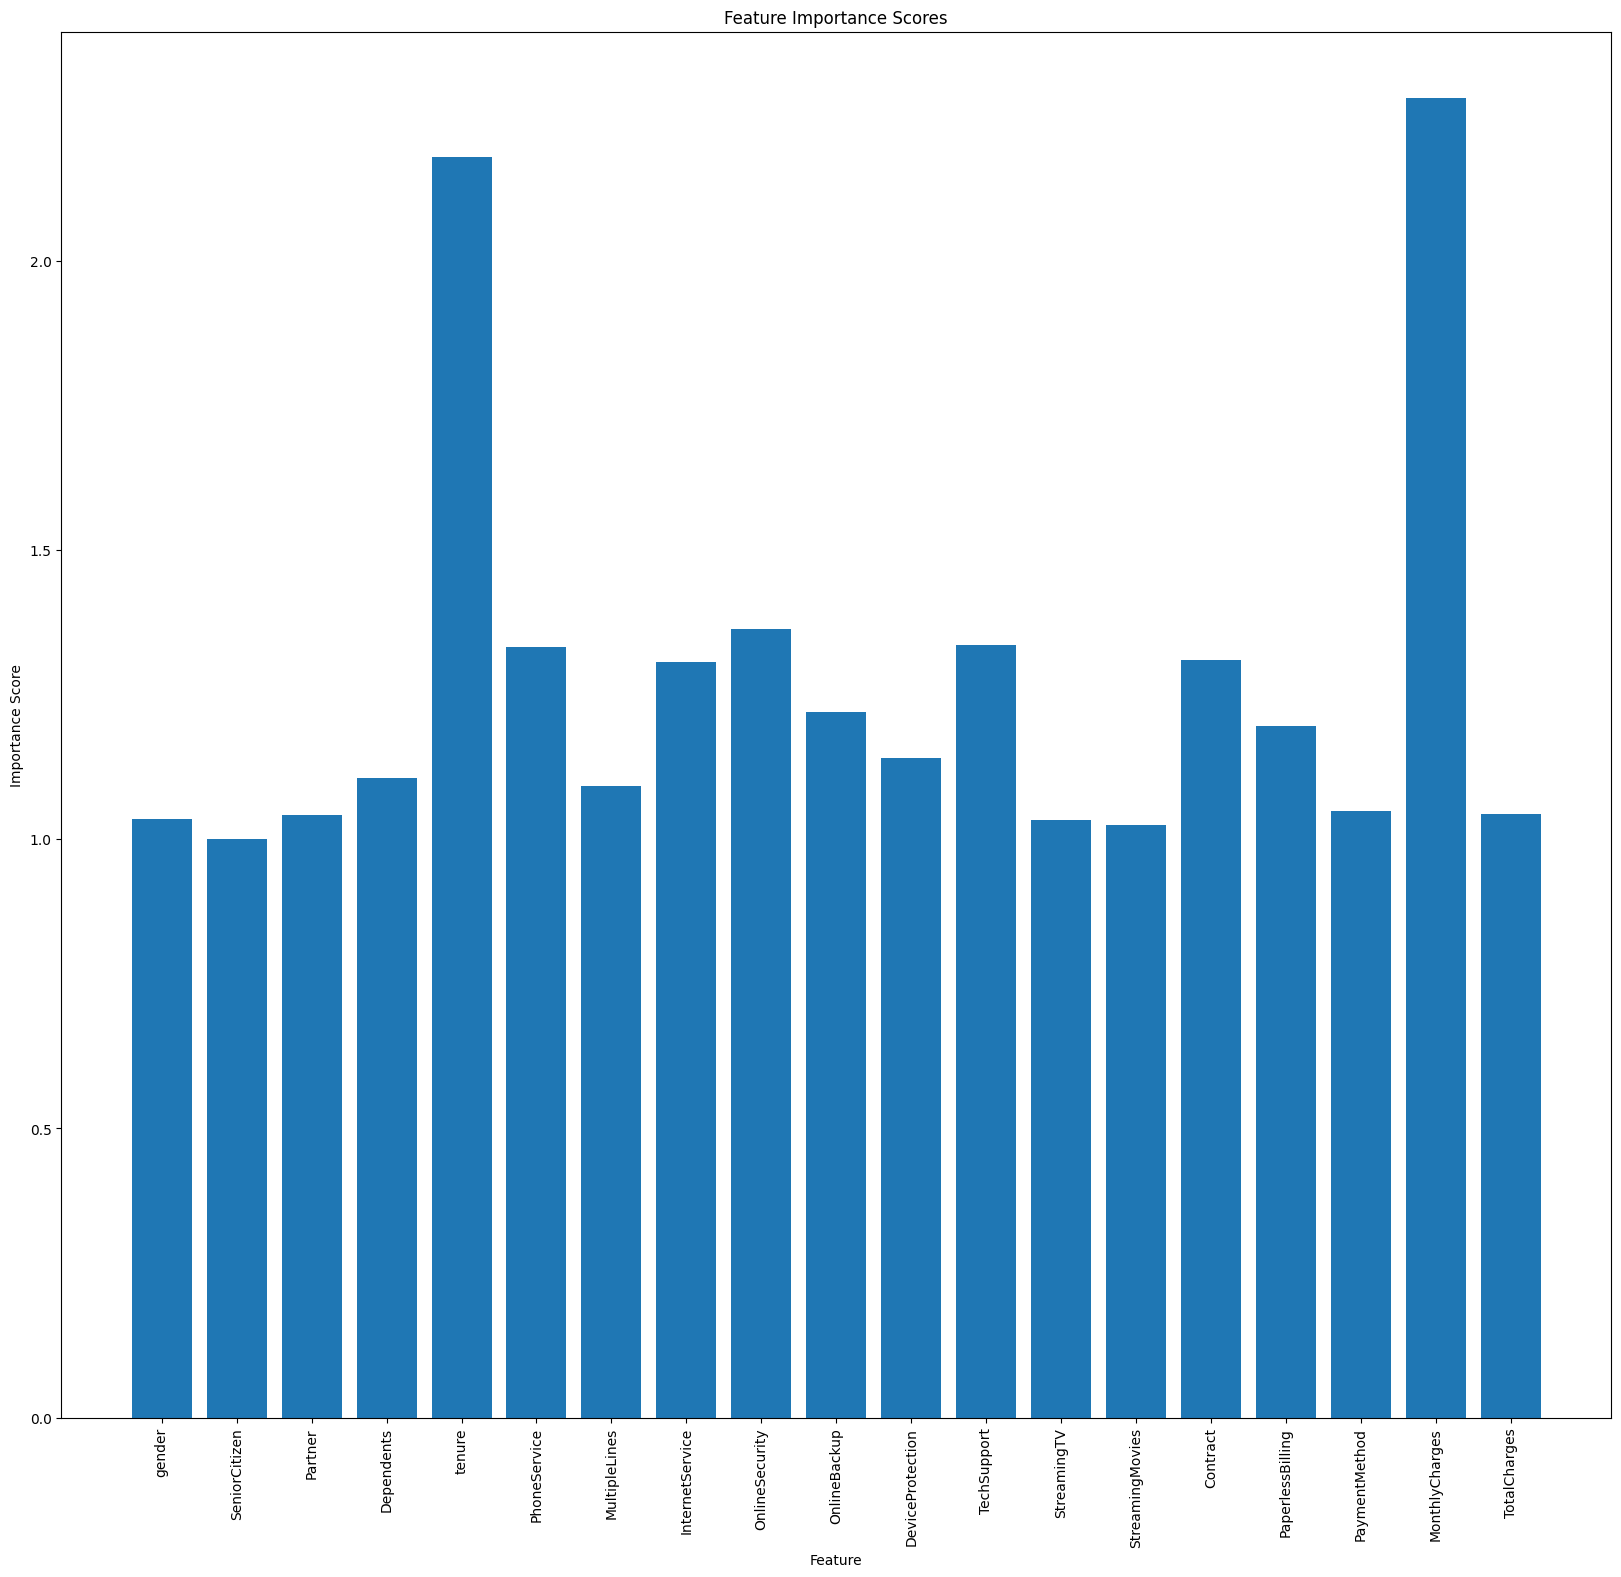

In [51]:
plt.figure(figsize=(20,18))
plt.bar(feature_indices,lda_coefficients)
plt.xticks(feature_indices,feature_names,rotation="vertical")
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores')
plt.show()

In [52]:
df_feature_score=pd.DataFrame({"Feature_names":feature_names,"feature_scores":lda_coefficients})

In [56]:
top_10_values=df_feature_score.nlargest(10,'feature_scores')

In [57]:
top_10_values.head(10)

,Feature_names,feature_scores
17,MonthlyCharges,2.282171
4,tenure,2.179476
8,OnlineSecurity,1.363942
11,TechSupport,1.335625
5,PhoneService,1.332346
14,Contract,1.309350
7,InternetService,1.307161
9,OnlineBackup,1.220667
15,PaperlessBilling,1.196498
10,DeviceProtection,1.140414


In [58]:
top_10_values.index

Int64Index([17, 4, 8, 11, 5, 14, 7, 9, 15, 10], dtype='int64')

In [59]:
x_train=x_train[:,[17, 4, 8, 11, 5, 14, 7, 9, 15, 10]]

In [60]:
x_test=x_test[:,[17, 4, 8, 11, 5, 14, 7, 9, 15, 10]]

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

In [63]:
random_forest.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [64]:
rf_predictions = random_forest.predict(x_test)

In [66]:
from sklearn.metrics import *

In [67]:
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_accuracy

0.7892122072391767

In [68]:
li = [50,100,200,300,400,500,600,700,800,900,1000]
accuracy_li = []

for i in li:

    Rd_model = RandomForestClassifier(n_estimators=i)
    Rd_model.fit(x_train,y_train)
    pred = Rd_model.predict(x_test)
    a = accuracy_score(y_test,pred)
    accuracy_li.append(a)

In [69]:
accuracy_li

[0.7835344215755855,
 0.7821149751596878,
 0.7856635911994322,
 0.7849538679914834,
 0.7863733144073811,
 0.78708303761533,
 0.7828246983676366,
 0.7849538679914834,
 0.7842441447835344,
 0.7849538679914834,
 0.7835344215755855]

In [70]:
d = {"Number of Trees":li, "Accuracy":accuracy_li}
df = pd.DataFrame(d)
df

,Number of Trees,Accuracy
0,50,0.783534
1,100,0.782115
2,200,0.785664
3,300,0.784954
4,400,0.786373
5,500,0.787083
6,600,0.782825
7,700,0.784954
8,800,0.784244
9,900,0.784954


In [71]:
max(accuracy_li)

0.78708303761533

In [72]:
Rd_model = RandomForestClassifier(n_estimators=300)
Rd_model.fit(x_train,y_train)
pred = Rd_model.predict(x_test)
preda1 = accuracy_score(pred,y_test)

In [73]:
pred

array([1, 0, 0, ..., 0, 0, 0])

In [74]:
preda1

0.7842441447835344

In [75]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [76]:
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier(base_estimator=tree, n_estimators=100, random_state=42)
bc.fit(x_train,y_train)
y_pred=bc.predict(x_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1036
           1       0.59      0.47      0.53       373

    accuracy                           0.77      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.76      0.77      0.77      1409

0.7743080198722498


In [77]:
from sklearn.ensemble import ExtraTreesClassifier

In [79]:
et=ExtraTreesClassifier(n_estimators=100, max_features=10, random_state=42)
et.fit(x_train,y_train)
y_pred=et.predict(x_test)

In [80]:
accuracy_score(y_test,y_pred)

0.7735982966643009

In [81]:
confusion_matrix(y_test,y_pred)

array([[900, 136],
       [183, 190]], dtype=int64)

In [82]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1036
           1       0.58      0.51      0.54       373

    accuracy                           0.77      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.77      0.77      0.77      1409



In [83]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(n_estimators=100)
abc.fit(x_train,y_train)
y_pred=abc.predict(x_test)

In [84]:
accuracy_score(y_test,y_pred)

0.8069552874378992

In [85]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc.fit(x_train,y_train)
y_pred=gbc.predict(x_test)

In [86]:
accuracy_score(y_test,y_pred)

0.8105039034776437

In [87]:
from xgboost import XGBClassifier

In [88]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)

In [89]:
accuracy_score(y_test,y_pred)

0.7920511000709723

In [90]:
from sklearn.model_selection import GridSearchCV

In [95]:
classifiers = [
    (RandomForestClassifier(), {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}),
    (GradientBoostingClassifier(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.01, 0.001]}),
    (XGBClassifier(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.01, 0.001]}),
    (AdaBoostClassifier(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.01, 0.001]}),
    (ExtraTreesClassifier(), {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]})
]

In [96]:
best_models = {}

for clf, param_grid in classifiers:
    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(x_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    best_models[str(best_model)] = accuracy

In [97]:
for model, accuracy in best_models.items():
    print(f"{model} - Accuracy: {accuracy:.4f}")

RandomForestClassifier(max_depth=10, n_estimators=300) - Accuracy: 0.8084
GradientBoostingClassifier() - Accuracy: 0.8105
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) - Accuracy: 0.8055
AdaBoostClassifier(learning_rate=0.1, n_estimators=200) - Accuracy: 0.8055
ExtraTreesClassifier(max_depth=10,